In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

# Deutsch Algorithm
First we create the quantum circuit for the Deutsch algorithm with f(x)=x. Then the oracle becomes a cnot gate

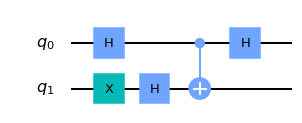

In [2]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.h(1)
circ.cx(0,1) #oracle here for f(x)=x
circ.h(0)
circ.draw('mpl')

Now we add the measurement equipment

In [3]:
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
meas.measure(range(2), range(2)) # map the quantum measurement to the classical bits

qc = circ + meas
qc.draw()

┌───┐          ┌───┐ ░ ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─░─┤M├───
     ├───┤┌───┐┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├──────░──╫─┤M├
     └───┘└───┘└───┘      ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

#### Now we first let the system run on the QASM simulator.

Counts for QASM: {'01': 516, '11': 508}


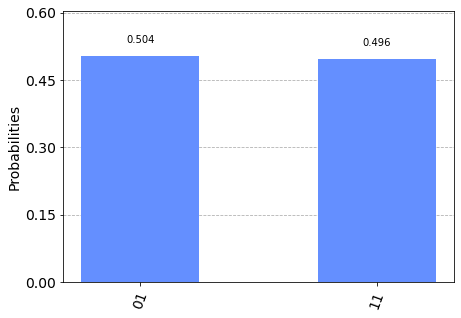

In [4]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print("Counts for QASM:", counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

#### Now we simulate the Deutsch algorithm on the IBM machine

In [5]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

C:\Users\Lenovo\anaconda3\envs\py3Q\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_athens


In [6]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


Counts for IBM machine: {'00': 21, '01': 488, '10': 21, '11': 494}


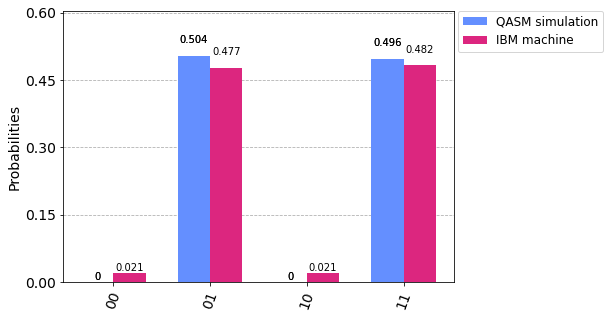

In [7]:
from qiskit.visualization import plot_histogram
results = job.result()
answer = results.get_counts()
print("Counts for IBM machine:", answer)

plot_histogram((counts, answer), legend=['QASM simulation','IBM machine']) # ibm machine

# Grover algorithm

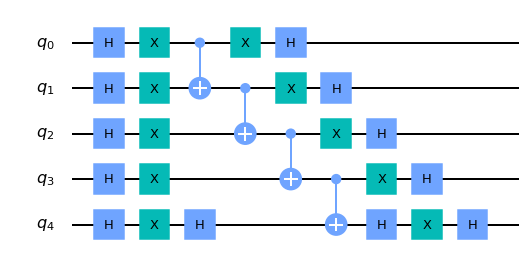

In [8]:
circ2 = QuantumCircuit(5)
for i in range(5):
    circ2.h(i)
    circ2.x(i)
circ2.h(4)

# insert her the Toffoli gate as an oracle

circ2.h(4)
for i in range(5):
    circ2.x(i)
    circ2.h(i)
circ2.draw('mpl')